In [27]:
#Importing thi Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")


In [28]:
#simple process the data


df=pd.read_csv("mushrooms.csv")
target_var = df['class']

y = LabelEncoder().fit_transform(target_var)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [41]:
#by this code we see entire data


pd.set_option("display.max_rows", None)  

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [31]:
df.shape                   #we have 8124 rows and 23 columns including the target column

(8124, 23)

In [32]:
#Showing the data types of data

df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [33]:
df.describe()                             #statistcal summary

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [34]:
df.isnull().sum()                               # checking the null values in the dataset

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

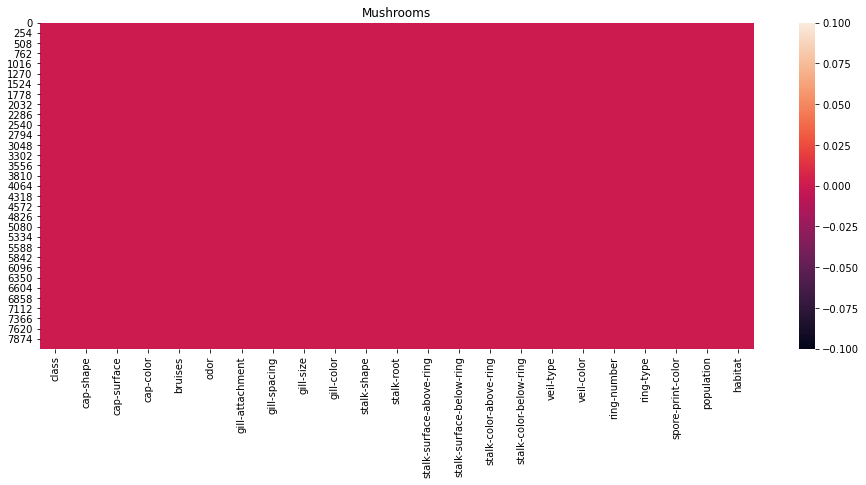

In [49]:
#Checking Correlation 

plt.figure(figsize=[16,6])      #increased Plot Size
sns.heatmap(df.isnull())
plt.title("Mushrooms")
plt.show()

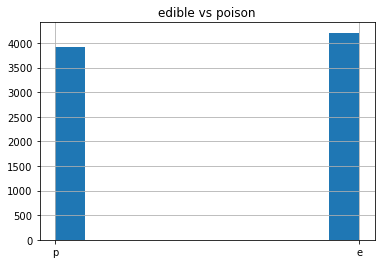

In [44]:
df["class"].hist(grid=2)
plt.title("edible vs poison")
plt.show()

              precision    recall  f1-score   support

      edible       0.70      0.75      0.72      3366
      poison       0.71      0.66      0.69      3133

    accuracy                           0.71      6499
   macro avg       0.71      0.70      0.70      6499
weighted avg       0.71      0.71      0.71      6499

accuracy:  0.7061086320972457


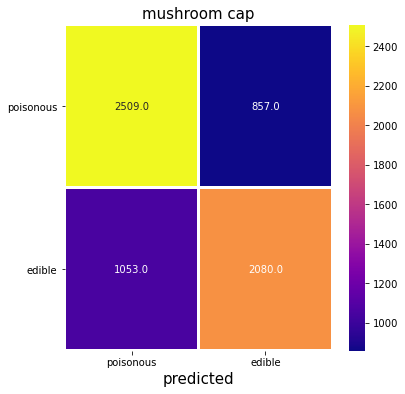

In [37]:
#Train Test Split 

# Find some phenotypicalfeature able to dicriminate between edible and poison mushrooms
# For this cross validation using Random Forest Classifier for identify the most predictive plant parts

#CAPS:-

from sklearn.model_selection import cross_val_predict 
model_accuracy=[]

caps=df[["cap-color","cap-shape","cap-surface"]]
x_dum=pd.get_dummies(caps).values
x_train,x_test,y_train,y_test=train_test_split(x_dum,y,stratify=y,
                                               test_size=0.2,random_state=101)

rfc_caps= RandomForestClassifier(n_estimators=100,random_state=42)
rfc_caps.fit(x_train,y_train)


y_train_ped=cross_val_predict(rfc_caps,x_train,y_train,cv=5)
print(classification_report(y_train,y_train_pred,target_names=['edible','poison']))
print('accuracy: ', accuracy_score(y_train,y_train_pred))
model_accuracy.append(accuracy_score(y_train,y_train_pred))
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           cmap = 'plasma', annot = True,
            fmt = '.1f', cbar = True,linewidth = 2, 
            yticklabels=('poisonous', 'edible'),
            xticklabels=('poisonous', 'edible')
           )
plt.title("mushroom cap", fontsize = 15)

plt.yticks(rotation=0)
plt.xlabel("predicted",fontsize=15)
plt.ylabel
plt.show()
            




              precision    recall  f1-score   support

           0       0.52      0.55      0.54      3366
           1       0.49      0.46      0.47      3133

    accuracy                           0.51      6499
   macro avg       0.50      0.50      0.50      6499
weighted avg       0.50      0.51      0.50      6499

accuracy:  0.5051546391752577


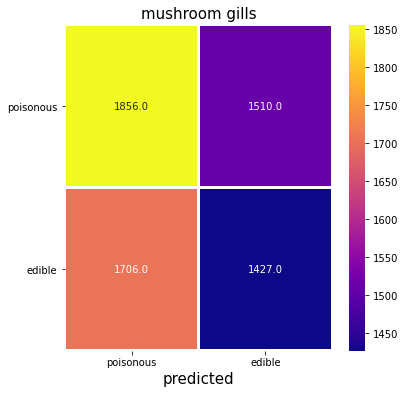

In [38]:
#GILLS:-


gills=df[["gill-attachment","gill-spacing","gill-size","gill-color"]]
x_gills= pd.get_dummies(gills).values
x_train,x_test,y_train,y_test=train_test_split(x_gills,y,stratify=y,test_size=0.2,random_state=100)
rfc_gills=RandomForestClassifier(n_estimators=100,random_state=40)
rfc_gills.fit(x_train,y_train)

y_train_ped=cross_val_predict(rfc_caps,x_train,y_train,cv=5)
print(classification_report(y_train,y_train_pred))
print('accuracy: ', accuracy_score(y_train,y_train_pred))
model_accuracy.append(accuracy_score(y_train,y_train_pred))
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           cmap = 'plasma', annot = True,
            fmt = '.1f', cbar = True,linewidth = 2, 
            yticklabels=('poisonous', 'edible'),
            xticklabels=('poisonous', 'edible')
           )
plt.title("mushroom gills", fontsize = 15)

plt.yticks(rotation=0)
plt.xlabel("predicted",fontsize=15)
plt.ylabel
plt.show()
                            


              precision    recall  f1-score   support

           0       0.70      0.75      0.72      3366
           1       0.71      0.66      0.69      3133

    accuracy                           0.71      6499
   macro avg       0.71      0.70      0.70      6499
weighted avg       0.71      0.71      0.71      6499

accuracy:  0.7061086320972457


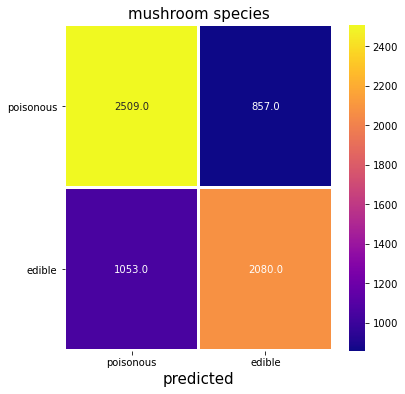

In [51]:
# In this step we are differentiate between the two mushroom species Caps and Gills 
#find the avg and accuracy of both species between Caps and Gills 
# In this steps we combine the both attribute
#Overall Accuracy between Caps and Gills

gills_caps=df[["gill-attachment","gill-spacing","gill-size","gill-color","cap-color","cap-shape","cap-surface"]]
x_gills= pd.get_dummies(gills).values
x_train,x_test,y_train,y_test=train_test_split(x_gills,y,stratify=y,test_size=0.2,random_state=101)
rfc_gills=RandomForestClassifier(n_estimators=100,random_state=40)
rfc_gills.fit(x_train,y_train)

y_train_ped=cross_val_predict(rfc_caps,x_train,y_train,cv=5)
print(classification_report(y_train,y_train_pred))
print('accuracy: ', accuracy_score(y_train,y_train_pred))
model_accuracy.append(accuracy_score(y_train,y_train_pred))
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           cmap = 'plasma', annot = True,
            fmt = '.1f', cbar = True,linewidth = 2, 
            yticklabels=('poisonous', 'edible'),
            xticklabels=('poisonous', 'edible')
           )
plt.title("mushroom species", fontsize = 15)

plt.yticks(rotation=0)
plt.xlabel("predicted",fontsize=15)
plt.ylabel
plt.show()